# Задача 1: предсказание уровня удовлетворённости сотрудника

Для этой задачи заказчик предоставил данные с признаками:
* id — уникальный идентификатор сотрудника;
* dept — отдел, в котором работает сотрудник;
* level — уровень занимаемой должности;
* workload — уровень загруженности сотрудника;
* employment_years — длительность работы в компании (в годах);
* last_year_promo — показывает, было ли повышение за последний год;
* last_year_violations — показывает, нарушал ли сотрудник трудовой договор за последний год;
* supervisor_evaluation — оценка качества работы сотрудника, которую дал руководитель;
* salary — ежемесячная зарплата сотрудника;
* job_satisfaction_rate — уровень удовлетворённости сотрудника работой в компании, целевой признак.

## Шаг 1. Загрузка данных

Загрузите файлы с данными:
Тренировочная выборка:

* train_job_satisfaction_rate.csv

Входные признаки тестовой выборки:

* test_features.csv

Целевой признак тестовой выборки:

* test_target_job_satisfaction_rate.csv

# Шаг 2. Предобработка данных

Изучите данные и сделайте выводы. При необходимости выполните предобработку. Если есть пропуски, заполните их в пайплайне.

# Шаг 3. Исследовательский анализ данных

Исследуйте все признаки и сделайте выводы о том, как их нужно подготовить.

# Шаг 4. Подготовка данных

Подготовку признаков выполните в пайплайне, дополнив пайплайн шагом предобработки. При кодировании учитывайте особенности признаков и моделей и используйте как минимум два кодировщика.

# Шаг 5. Обучение моделей
Обучите как минимум две модели. Возьмите одну линейную модель, а в качестве второй — дерево решений. Подберите гиперпараметры как минимум для одной модели с помощью одного из известных вам инструментов.
Выберите лучшую модель и проверьте её качество. Выбор делайте на основе новой метрики — SMAPE (англ. symmetric mean absolute percentage error, «симметричное среднее абсолютное процентное отклонение»). 

Напишите функцию, которая принимает на вход массивы NumPy или объекты Series в pandas и возвращает значение метрики SMAPE. Используйте эту метрику при подборе гиперпараметров и оценке качества моделей. 
Критерий успеха: SMAPE ≤ 15 на тестовой выборке.
В решении сохраните работу со всеми моделями, которые вы пробовали. Сделайте выводы.

# Шаг 6. Оформление выводов

Сделайте промежуточные выводы о том, какая модель справилась лучше и почему.

In [1]:
!pip install -U scikit-learn -q
!pip install phik -q
!pip install imbalanced-learn -q
!pip install shap -q

## Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import phik
from sklearn.metrics import make_scorer
from imblearn.pipeline import Pipeline
import sklearn 

plt.rcParams["figure.figsize"] = (14,8)

# загружаем класс pipeline
#from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# загружаем классы для подготовки данных
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler,LabelEncoder

# загружаем класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import (accuracy_score,
                            confusion_matrix,
                            mean_absolute_error, mean_squared_error,
                            precision_score,
                            recall_score,
                            r2_score, roc_auc_score)

# классы для перебора признаков
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Для перебора использовать распределение, а не range
#from optuna.integration import OptunaSearchCV

# загружаем нужные модели
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


In [5]:
train.isna().sum()

id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64

In [6]:
train.duplicated().sum()

0

In [7]:
for col in train.columns:
    print(col)
    display(train[col].value_counts())

id


296961    1
898488    1
783768    1
910746    1
613789    1
         ..
463527    1
862888    1
548638    1
624165    1
428031    1
Name: id, Length: 4000, dtype: int64

dept


sales         1512
technology     866
purchasing     610
marketing      550
hr             456
Name: dept, dtype: int64

level


junior    1894
middle    1744
sinior     358
Name: level, dtype: int64

workload


medium    2066
low       1200
high       734
Name: workload, dtype: int64

employment_years


1     966
2     785
3     483
4     384
5     380
7     301
6     287
8     193
9     130
10     91
Name: employment_years, dtype: int64

last_year_promo


no     3880
yes     120
Name: last_year_promo, dtype: int64

last_year_violations


no     3441
yes     559
Name: last_year_violations, dtype: int64

supervisor_evaluation


4    1603
3    1263
5     546
2     387
1     201
Name: supervisor_evaluation, dtype: int64

salary


24000    187
27600    184
26400    167
21600    167
28800    164
        ... 
85200      1
91200      1
97200      1
74400      1
98400      1
Name: salary, Length: 68, dtype: int64

job_satisfaction_rate


0.65    94
0.67    90
0.68    85
0.69    84
0.66    81
        ..
0.94     4
0.04     4
0.98     3
0.03     3
1.00     2
Name: job_satisfaction_rate, Length: 98, dtype: int64

In [8]:
train['last_year_violations'] = train['last_year_violations'].replace({'no':0, 'yes':1})
train['last_year_promo'] = train['last_year_promo'].replace({'no':0, 'yes':1})

In [9]:
features = pd.read_csv('/datasets/test_features.csv')
features

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [11]:
features.isna().sum()

id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64

In [12]:
features[features.isnull().any(axis=1)]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
312,471990,sales,NaN,low,1,no,no,3,12000
1196,832342,NaN,junior,medium,1,no,no,4,28800


In [13]:
features['last_year_violations'] = features['last_year_violations'].replace({'no':0, 'yes':1})
features['last_year_promo'] = features['last_year_promo'].replace({'no':0, 'yes':1})

In [14]:
target_test = pd.read_csv('/datasets/test_target_job_satisfaction_rate.csv')
target_test.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [15]:
target_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


<strong font='+10'>Вывод </strong>

Все данные хорошо импортировались, никаких трудностей при чтении не появлялось. Все типы данных соблюдены. Заполнение пропусков будет сделано дальше. Сейчас сразу перехожу к шагу 3 - Исследовательский анализ

## Предобработка данных часть 1

In [16]:
train.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,0,0,1,24000,0.58
1,653870,hr,junior,high,2,0,0,5,38400,0.76
2,184592,sales,junior,low,1,0,0,2,12000,0.11
3,171431,technology,junior,low,4,0,0,2,18000,0.37
4,693419,hr,junior,medium,1,0,0,3,22800,0.20


In [17]:
train.shape

(4000, 10)

In [18]:
features.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,0,0,5,28800
1,686555,hr,junior,medium,1,0,0,4,30000
2,467458,sales,middle,low,5,0,0,4,19200
3,418655,sales,middle,low,6,0,0,4,19200
4,789145,hr,middle,medium,5,0,0,5,40800


In [19]:
target_test.head()

,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


In [20]:
test_df = pd.merge(features,target_test, on='id')
test_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,0,0,5,28800,0.79
1,686555,hr,junior,medium,1,0,0,4,30000,0.72
2,467458,sales,middle,low,5,0,0,4,19200,0.64
3,418655,sales,middle,low,6,0,0,4,19200,0.60
4,789145,hr,middle,medium,5,0,0,5,40800,0.75


In [21]:
test_df.shape

(2000, 10)

Перейдем к исследовательскому анализу данных

## Исследовательский анализ данных часть 1

In [22]:
def create_hists(df, col):
    plt.subplot(1,2,1)
    plt.suptitle(col)
    
    df[col].plot(kind='hist', bins=20, figsize=(14, 8))
    plt.title('Histplot', fontsize=18)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Кол-во')
    plt.grid()
    
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col])
    plt.title('Boxplot', fontsize=18)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('Кол-во')
    plt.grid()
    
    plt.show()

In [23]:
def create_bars(df, feature):
    df.groupby(feature)['id'].count().plot(kind='bar', grid=True);
    plt.title(feature)
    plt.xlabel(None)
    plt.ylabel("Количество")
    plt.show()

In [24]:
train.sample()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
174,576571,hr,junior,low,1,0,0,4,13200,0.51


In [25]:
cat_col = ['level', 'workload','last_year_promo','last_year_violations', 'dept']
num_col = ['salary', 'job_satisfaction_rate','supervisor_evaluation','employment_years']

num_hist = ['salary', 'job_satisfaction_rate']
num_cat_bars = ['level', 'workload','last_year_promo','last_year_violations', 'dept','supervisor_evaluation','employment_years']

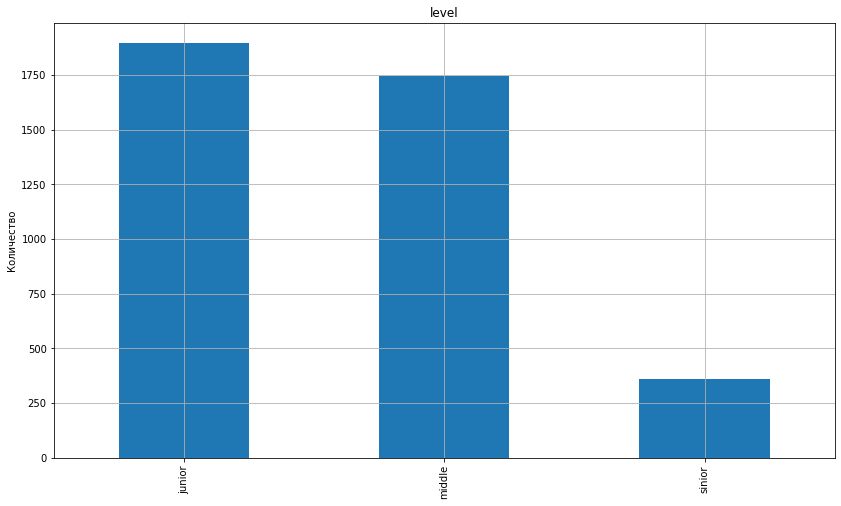

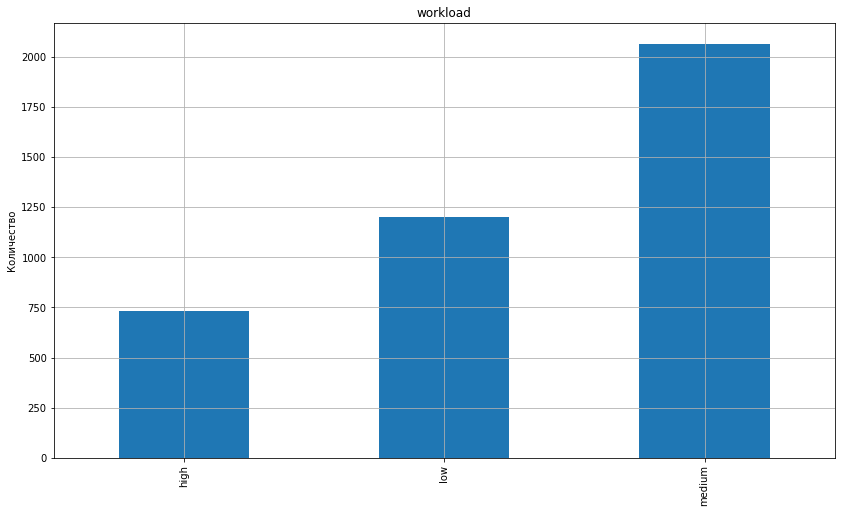

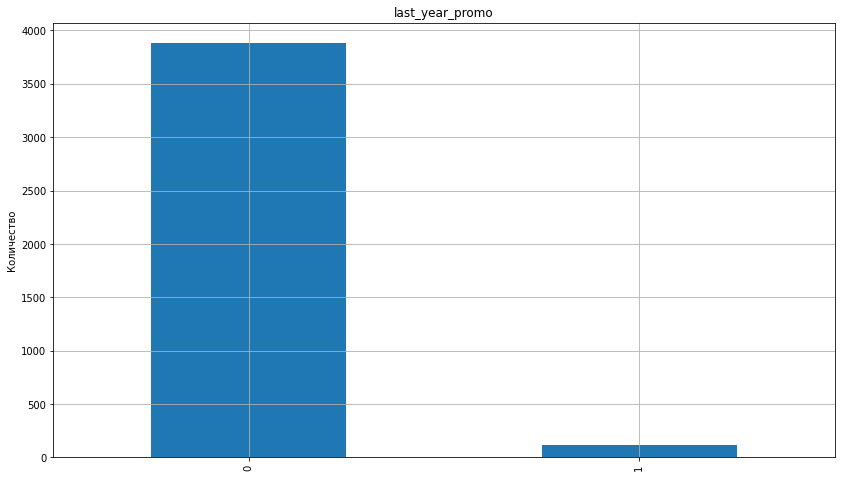

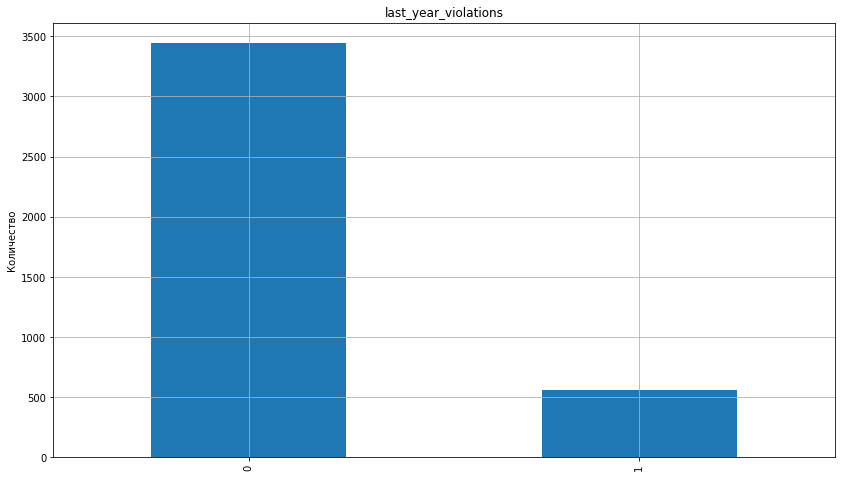

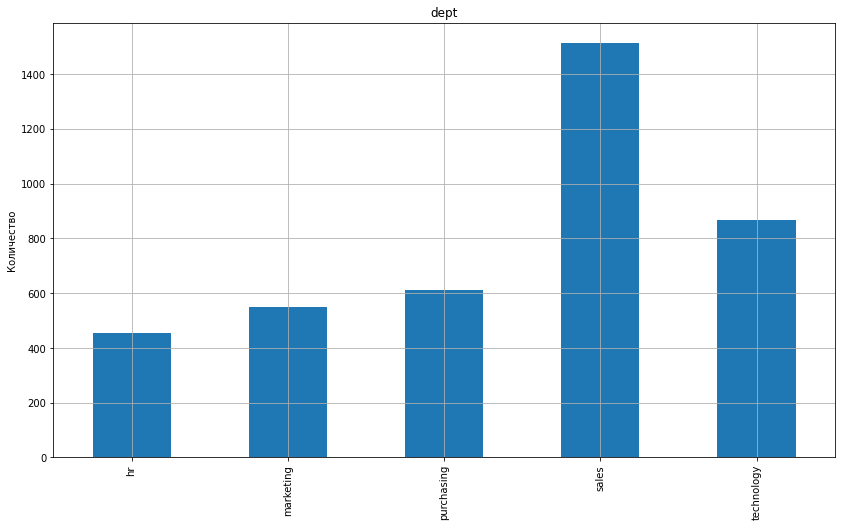

In [26]:
for col in cat_col:
    create_bars(train, col);

С точки зрения уровней сотрудников все достаточно очеивдно, Сеньор разработчиков в разы меньше, чем джуниор и мидл разработчиков

Загруженность сотрудников либо средняя либо низкая, чаще всего средняя

Однако у большинства работников не было никакого повышения

Нарушителей также мало 

Больше все сотрудников находятся в отделе продаж

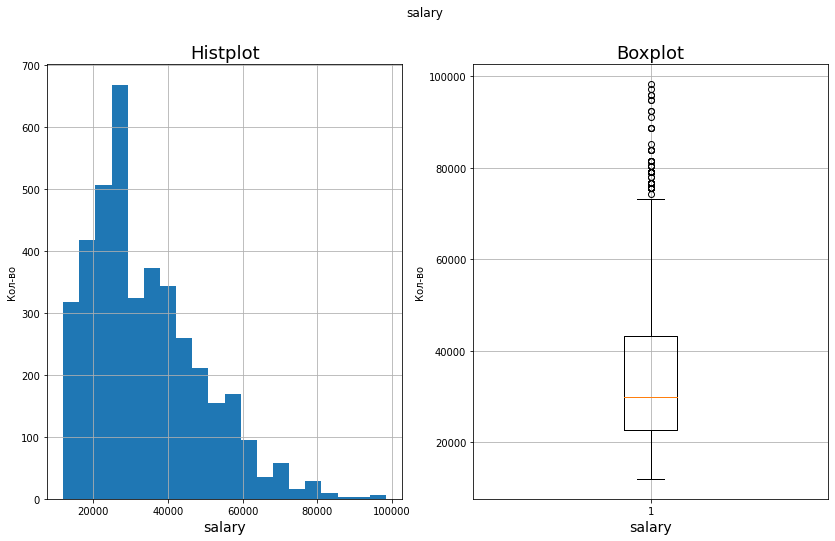

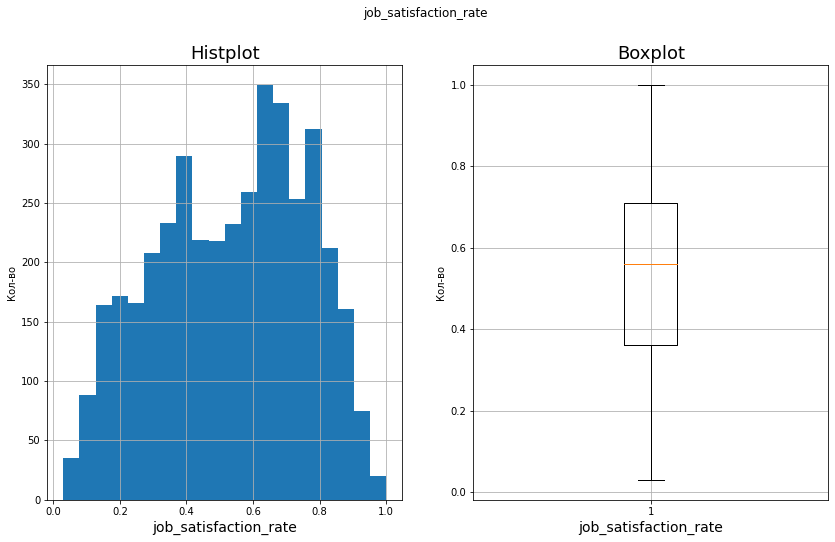

In [27]:
for col in num_hist:
    create_hists(train, col)

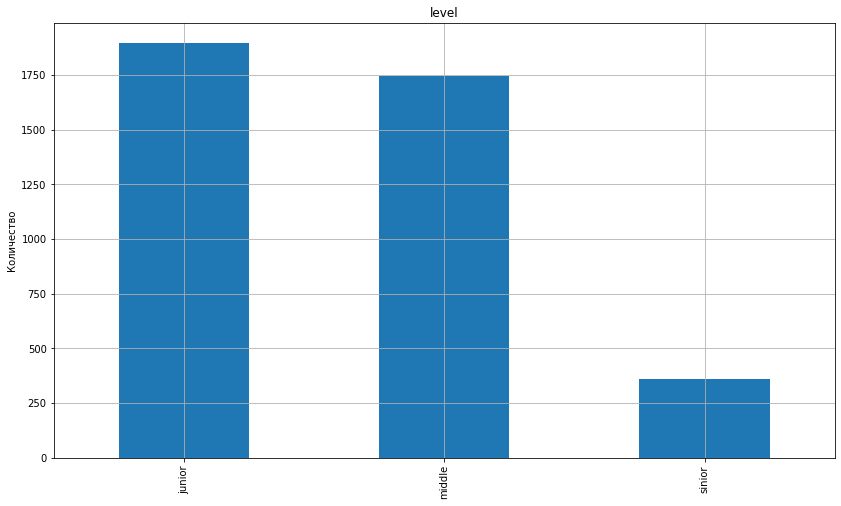

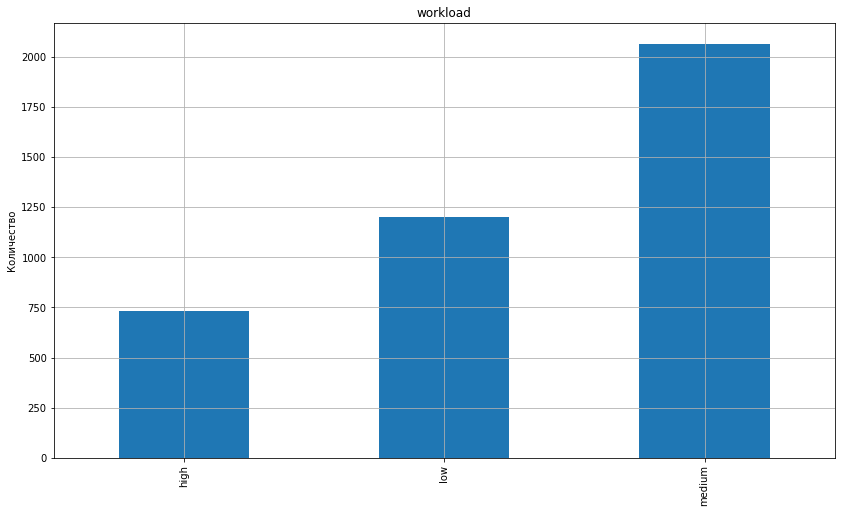

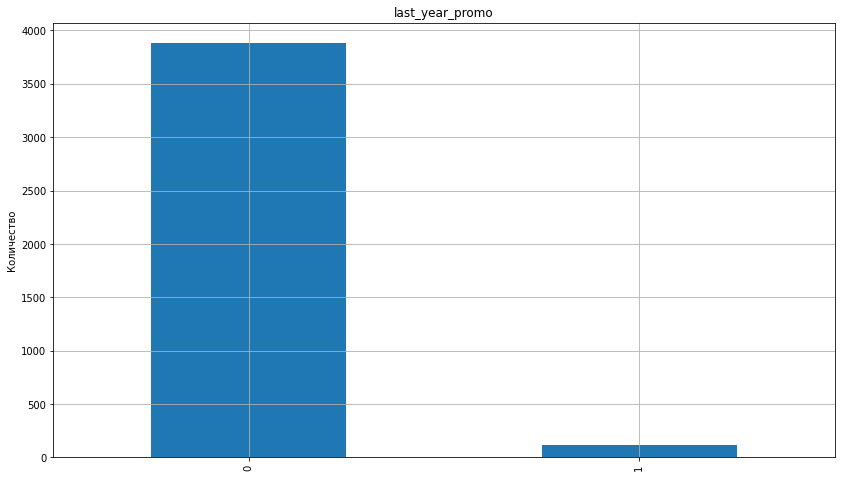

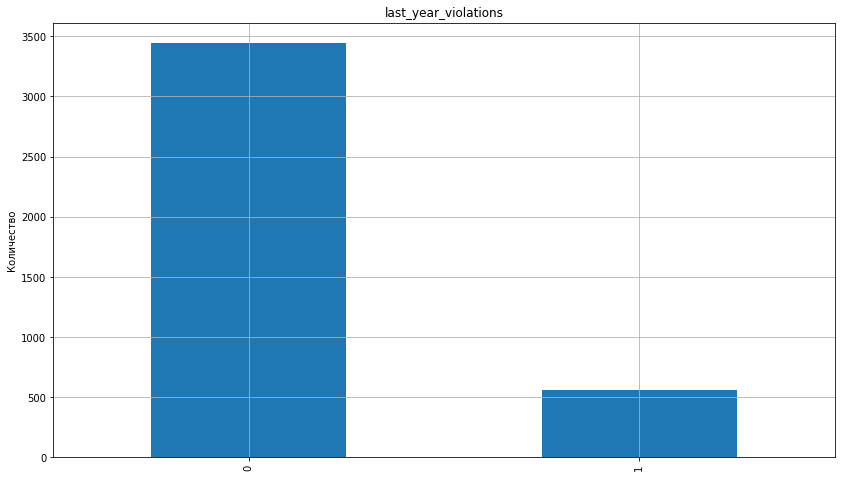

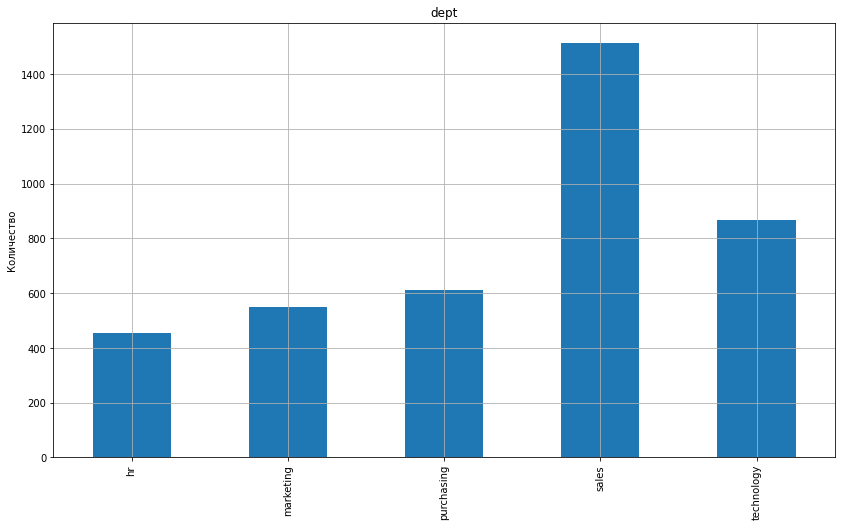

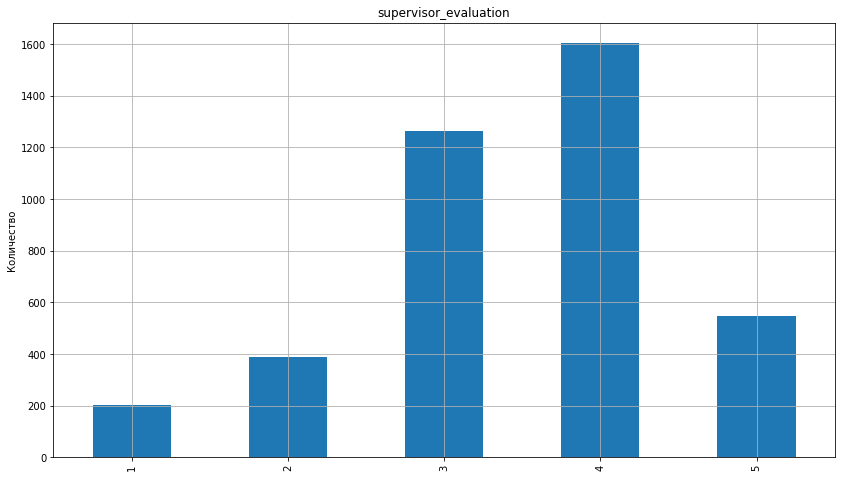

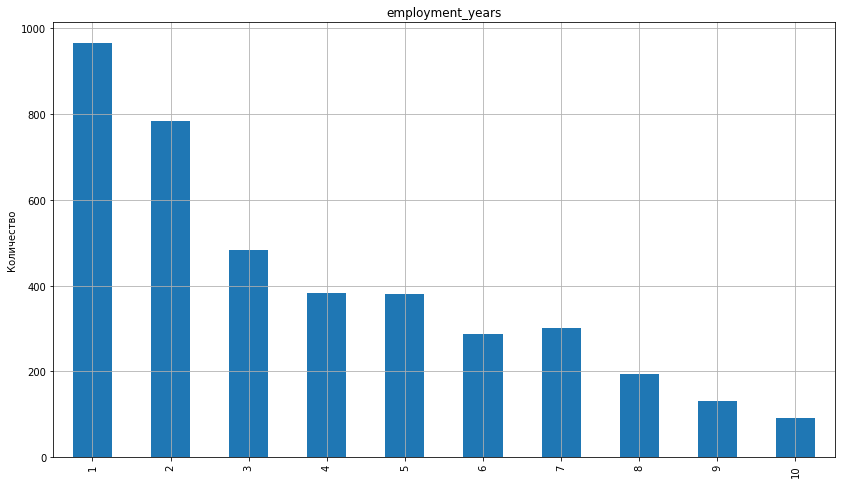

In [28]:
for col in num_cat_bars:
    create_bars(train, col)

Стоит рассмотреть поближе столбец с зарплатами, в остальном данные не скачут

В среднем оценки руководителя не ниже 3, хотя в компании все равно есть около 600 сотрудников с очень низкими оценками.

Гистограмма зарплаты смещена влево

Оценки удовлетворенности в большинстве своем лежат в промежутке от 0.6 до 0.8, однако есть и значения ниже 0.5, значения 0.4 многовато, тоже стоит проверить

In [29]:
train['supervisor_evaluation'].describe()

count    4000.000000
mean        3.476500
std         1.008812
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: supervisor_evaluation, dtype: float64

In [30]:
train[train['supervisor_evaluation']==1]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,0,0,1,24000,0.58
18,848242,sales,middle,high,2,1,0,1,50400,0.39
32,176144,hr,sinior,high,3,0,0,1,72000,0.22
45,538347,technology,sinior,high,3,0,0,1,84000,0.21
53,460328,technology,junior,high,1,0,0,1,37200,0.10
...,...,...,...,...,...,...,...,...,...,...
3877,947224,technology,junior,medium,3,0,0,1,30000,0.38
3949,157562,technology,middle,medium,3,0,0,1,49200,0.39
3972,134106,hr,middle,high,10,0,1,1,57600,0.39
3988,806663,sales,middle,low,8,0,0,1,22800,0.39


In [31]:
train['salary'].describe()

count     4000.000000
mean     33926.700000
std      14900.703838
min      12000.000000
25%      22800.000000
50%      30000.000000
75%      43200.000000
max      98400.000000
Name: salary, dtype: float64

In [32]:
train[train['salary'] > 43200]

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
6,857135,sales,sinior,medium,9,0,0,3,56400,0.56
7,400657,purchasing,middle,high,9,0,0,3,52800,0.44
9,149797,technology,middle,high,6,0,0,3,54000,0.47
18,848242,sales,middle,high,2,1,0,1,50400,0.39
21,887667,sales,sinior,medium,10,0,0,4,52800,0.80
...,...,...,...,...,...,...,...,...,...,...
3983,516472,hr,middle,high,7,0,0,4,60000,0.76
3992,854006,hr,middle,medium,4,0,0,3,45600,0.47
3993,424345,hr,sinior,high,6,0,0,4,80400,0.88
3995,457950,technology,junior,high,2,0,0,3,46800,0.45


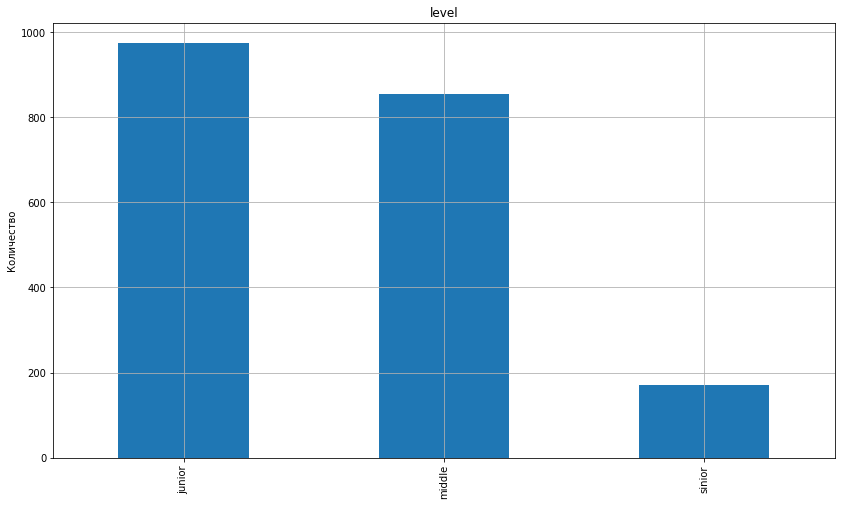

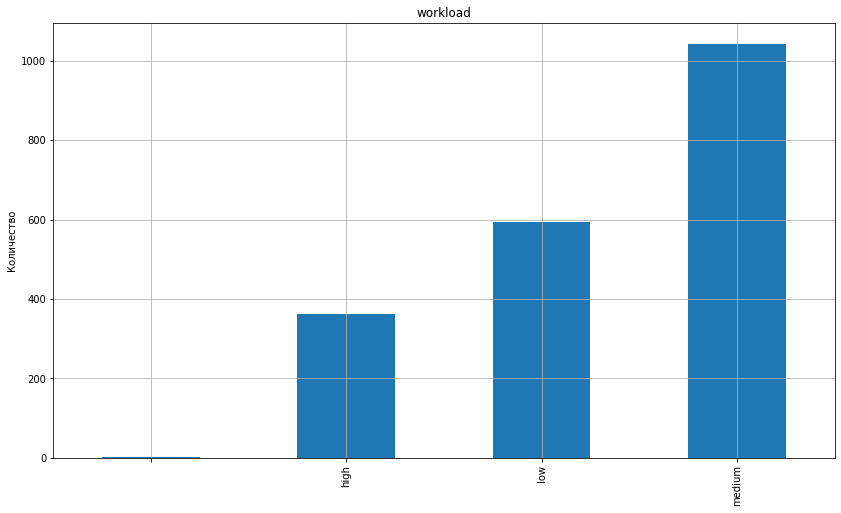

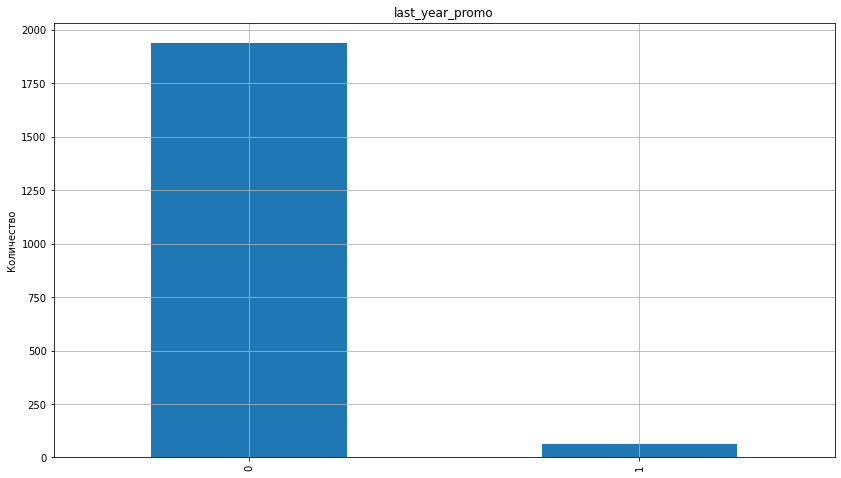

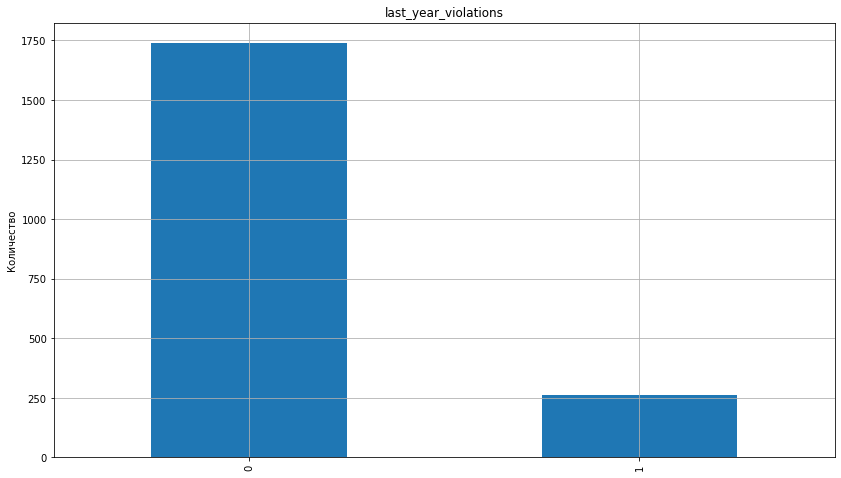

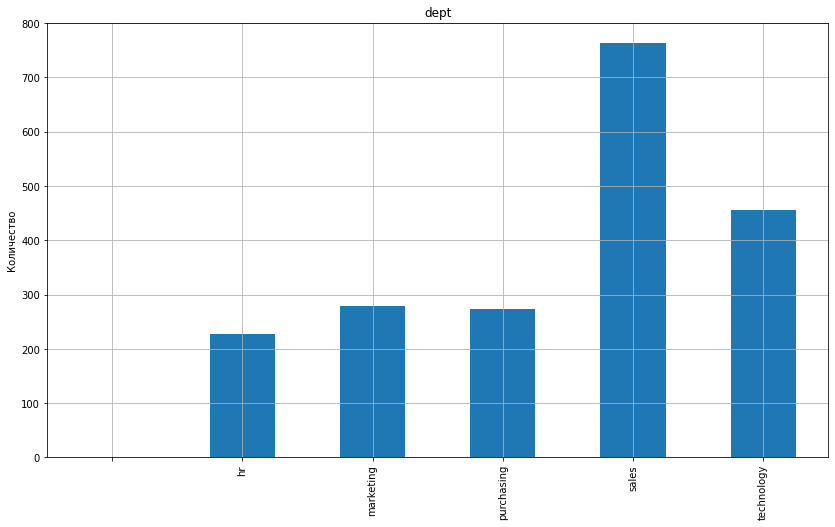

In [33]:
for col in cat_col:
    create_bars(test_df, col)

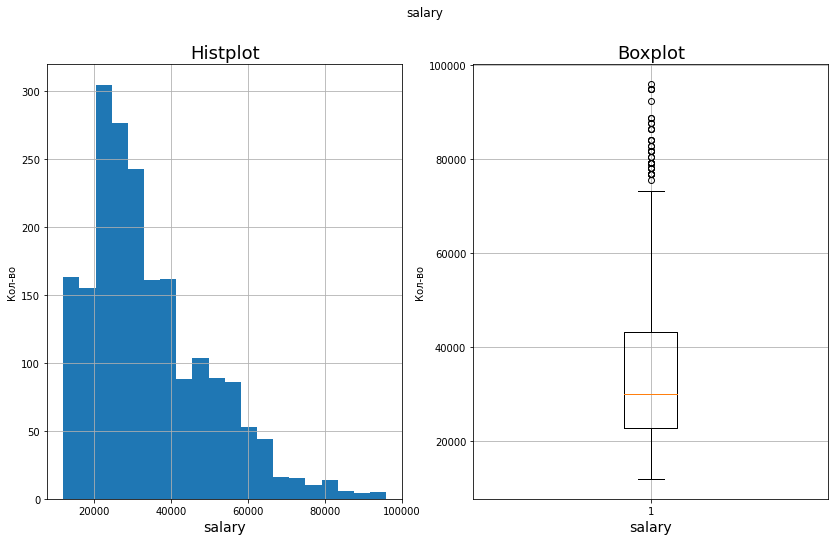

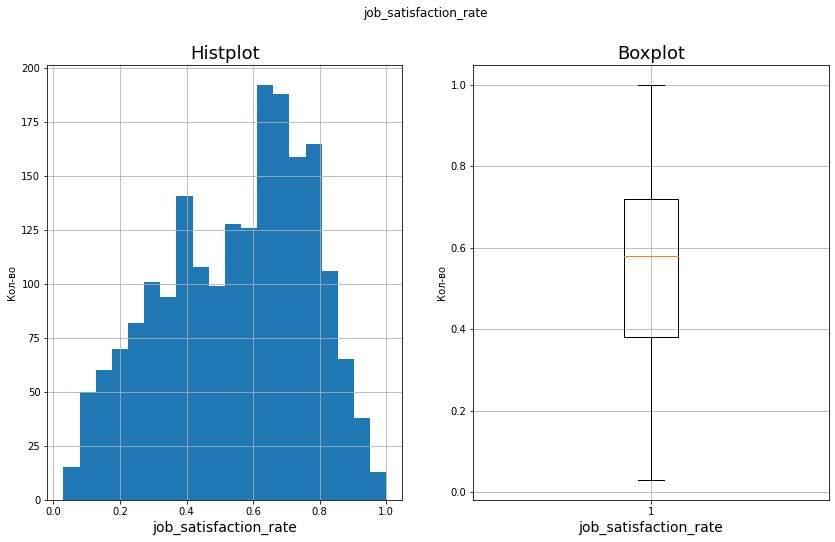

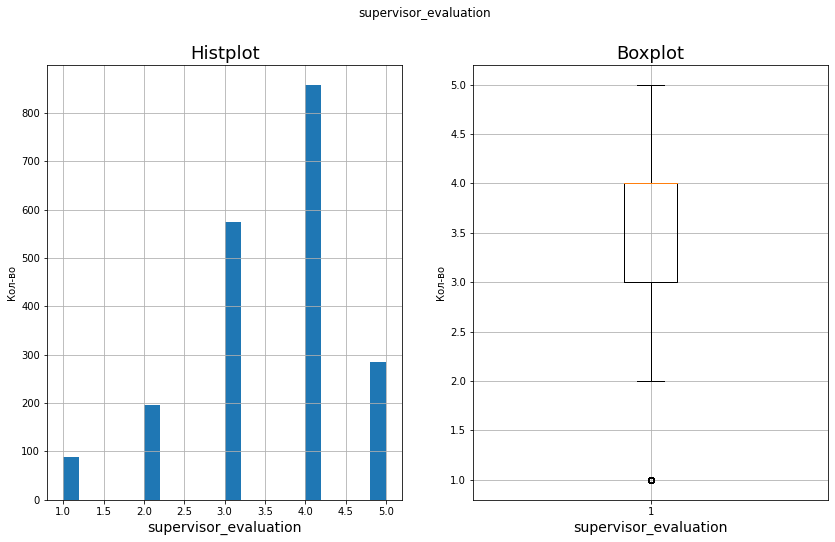

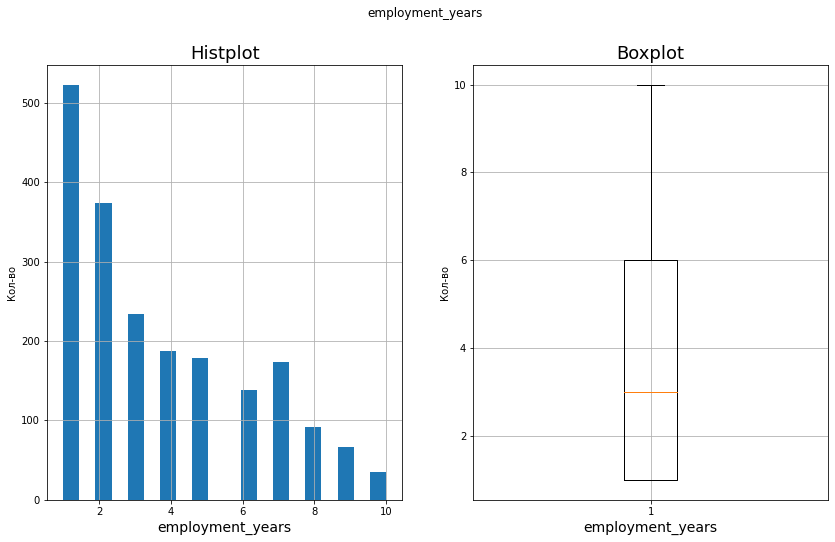

In [34]:
for col in num_col:
    create_hists(test_df, col)

Не наблюдаю особой разницы в показателях гистограмм

Немного видоизменилась гистограмма распредеделения зарплаты

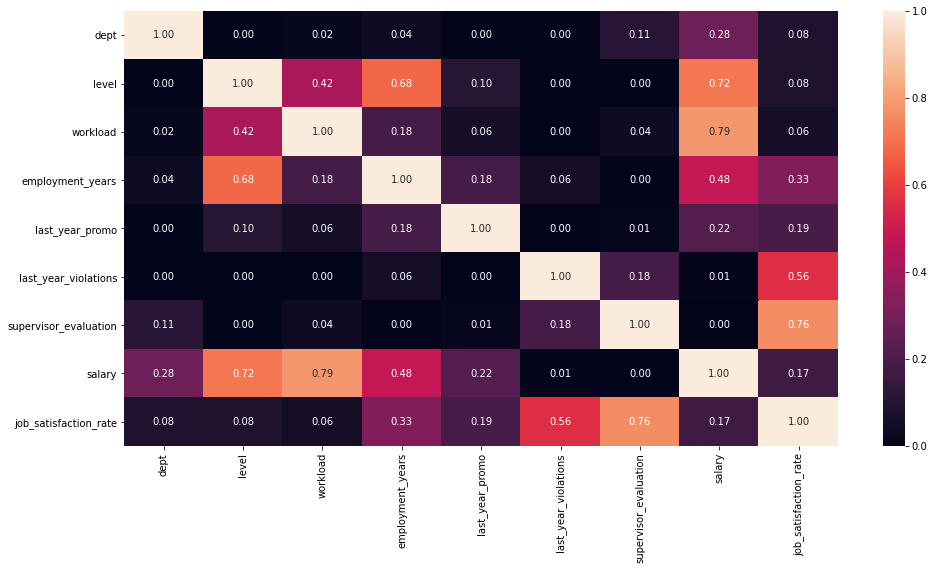

In [35]:
train_corr = train.drop("id", axis=1)
fig, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(train_corr.phik_matrix(interval_cols=num_col), annot=True, fmt=".2f");

## Подготовка данных часть 1

In [37]:
num_col = ['employment_years', 'supervisor_evaluation']

In [38]:
cat_col

['level', 'workload', 'last_year_promo', 'last_year_violations', 'dept']

In [39]:
ord_col = ['level', 'workload']

In [40]:
ohe_col = ['last_year_promo', 'last_year_violations', 'dept']

In [41]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

In [42]:
ord_pipe = Pipeline(
    [
                (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['Junior', 'Middle', 'Sinior'],
                    ['Low', 'Middle', 'High']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

In [43]:
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_col),
        ('ord', ord_pipe, ord_col),
        ('num', StandardScaler(), num_col)
    ], 
    remainder='passthrough'
)

In [44]:
pipe_final=Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=42))
])

param_distributions = [
    {
        'models': [DecisionTreeRegressor(random_state=42)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2, 9),
        'models__min_samples_leaf': range(2, 10),
        'models__min_samples_split':range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models':[LinearRegression()],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    {
        'models':[Lasso(random_state=42)],
        'models__alpha':[0.001, 0.01, 0.1, 1, 10, 100],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
      'models':[RandomForestRegressor(random_state=42)],
      'models__max_depth': range(2, 13),
      'models__max_features': range(2, 9),
      'models__n_estimators': [50, 70, 100],
      'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]


In [45]:
def smape(y_true, y_pred):
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    n = len(y_true)
    
    chis = np.abs(y_true - y_pred)
    diff = (np.abs(y_true) + np.abs(y_pred)) / 2
    
    smape_value = 100/n * np.sum( chis / diff)
    return smape_value

In [46]:
SMAPE = make_scorer(smape,greater_is_better=False)

In [47]:
X_train = train.drop(['job_satisfaction_rate', 'id'], axis=1)
y_train = train['job_satisfaction_rate']

X_test = test_df.drop(['job_satisfaction_rate', 'id'], axis=1)
y_test = test_df['job_satisfaction_rate']

## Обучение моделей часть 1

In [48]:
random_search = RandomizedSearchCV(
    pipe_final,
    param_distributions,
    cv=5,
    scoring=SMAPE,
    n_jobs=-1,
    random_state=42
)
random_search.fit(X_train, y_train)
print(-1 * random_search.best_score_)
print(f'Тестовая: {-1 * SMAPE(random_search.best_estimator_, X_test, y_test)}')

16.424223601533306
Тестовая: 14.929275120118431


In [49]:
random_search.best_params_

{'preprocessor__num': StandardScaler(),
 'models__n_estimators': 100,
 'models__max_features': 2,
 'models__max_depth': 12,
 'models': RandomForestRegressor(random_state=42)}

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

А где в теории ты нашёл то, что **лучшую модель** по результатам кросс-валидации следует тестировать **на валидационной выборке** "отрезанной" от тренировочной?
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Поправил, вижу, что модель нужно дообучить, значение слегка далековато от требуемых 15</font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Попробуй "поиграть" количеством гиперпараметров и "коридором" значений (от мин. до макс.) каждого из них.
</div>

<div class="alert alert-info">
Тут немного в затруднительном положении, модель выдает очень плохие значения на всех данных, как-будто обучения вообще не происходит, не понимаю, что делать сижу уже второй день, а дедлайны горят...
    
</div>

<div class="alert alert-warning">
<b>Комментарий 👉</b>

К вашей когорте прикреплен преподаватель. Можно получить у него консультацию. Сейчас вижу, что ты не очень понимаешь что такое кросс-валидация. Напиши преподавателю - он поможет с теорией.
    
Подсказка по исправлению ситуации с низкой метрикой - разобраться сколько, какие выборки нужны для запуска КВ. Также освежив памяти зачем нужна тестовая выборка.
    
Не хочешь обращаться к преподавателю - вот тут теория есть: https://education.yandex.ru/handbook/ml/article/kross-validaciya    
</div>

<strong>Отбор Признаков</strong>

In [50]:
model = random_search.best_estimator_.named_steps['models']

In [51]:
model

RandomForestRegressor(max_depth=12, max_features=2, random_state=42)

In [52]:
X_train.sample()

,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
2473,sales,middle,medium,7,0,0,4,33600


In [53]:
prep = random_search.best_estimator_.named_steps['preprocessor']

X_train_prep = prep.transform(X_train)
X_test_prep = prep.transform(X_test)

In [54]:
ohe_col_ = prep.named_transformers_['ohe'].get_feature_names_out(ohe_col)
ord_col_ = prep.named_transformers_['ord'].get_feature_names_out(ord_col)

In [55]:
model.fit(X_train_prep, y_train)

RandomForestRegressor(max_depth=12, max_features=2, random_state=42)

In [56]:
y_pred = model.predict(X_test_prep)

In [57]:
# import shap

# explainer = shap.Explainer(model, X_train_prep)
# shap_values = explainer(X_test_prep)
# # shap.summary_plot(shap_values, X_test_prep, feature_names=X_train.columns)
# shap.summary_plot(shap_values, X_test_prep, feature_names=train.columns)

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Мне получается сейчас нужно убрать признаки и обучить модель снова только уже на данных без нужного столбца</font>
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Здесь возникли проблемы, я прочитал про ошибку, но решения к сожалению найти не смог.
    
    Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. This check failed because for one of the samples the sum of the SHAP values was 0.458790, while the model output was 0.427698. If this difference is acceptable you can set check_additivity=False to disable this check.
    </font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Вопроса не понял. Вообще нужно взять лучшую модель (по результатам обучения) и с помощью библиотеки shap визуализировать признаки, которые влияют на прогноз модели.
    
Если уходишь в другую когорту - во время паузы "тереби" преподавателя (пусть поможет тебе с подготовкой проекта к сдаче).     
</div>

In [58]:
train_new = train.drop(['id'], axis=1)

# Задача 2

# Задача 2: предсказание увольнения сотрудника из компании

Для этой задачи вы можете использовать те же входные признаки, что и в предыдущей задаче. Однако целевой признак отличается: это quit — увольнение сотрудника из компании.

# <strong>Шаг 1. Загрузка данных</strong>

Загрузите данные из файлов:

Тренировочная выборка:
train_quit.csv

Входные признаки тестовой выборки те же, что и в прошлой задаче:
test_features.csv

Целевой признак тестовой выборки:
test_target_quit.csv

# Шаг 2. Предобработка данных</strong>
Изучите данные и при необходимости выполните предобработку. Если есть пропуски, заполните их в пайплайне.

# <strong>Шаг 3. Исследовательский анализ данных</strong>

* 3.1. Проведите исследовательский анализ данных.
* 3.2. Составьте портрет «уволившегося сотрудника». Например, можно узнать, в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности. Также можно сравнить среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.
* 3.3. Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверьте это утверждение: визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Используйте данные с обоими целевыми признаками тестовой выборки.

# <strong>Шаг 4. Добавление нового входного признака</strong>

Допустим, job_satisfaction_rate и quit действительно связаны и вы получили необходимое значение метрики в первой задаче. Тогда добавьте job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

# <strong>Шаг 5. Подготовка данных</strong>

Подготовьте признаки так же, как и в первой задаче: выполните подготовку в пайплайне, дополнив пайплайн предобработки. При кодировании учитывайте особенности признаков и моделей и используйте как минимум два кодировщика.

# <strong>Шаг 6. Обучение модели</strong>

Обучите как минимум три модели. Как минимум для двух из них подберите гиперпараметры. Проверьте качество лучшей модели.
Метрика оценки качества в этой задаче — ROC-AUC. Критерий успеха: ROC-AUC ≥ 0.91 на тестовой выборке. 
Напомним: отбор признаков часто помогает улучшить метрику.

# <strong>Шаг 7. Выводы</strong>

Сделайте промежуточные выводы о том, какая модель справилась лучше и почему.
Общий вывод
Сформулируйте общий вывод:
опишите задачу;
опишите все этапы работы;
добавьте выводы и дополнительные предложения для бизнеса.
Оформление

## Загрузка и предобработка данных часть 2

In [59]:
train_quit = pd.read_csv('/datasets/train_quit.csv')
train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


In [60]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


In [61]:
test_features = pd.read_csv('/datasets/test_features.csv')
test_features

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800
...,...,...,...,...,...,...,...,...,...
1995,393147,marketing,junior,low,3,no,no,3,20400
1996,109582,technology,middle,low,3,no,no,2,21600
1997,305653,technology,junior,low,1,no,no,3,14400
1998,160233,technology,middle,low,8,no,no,1,32400


In [62]:
target_quit = pd.read_csv('/datasets/test_target_quit.csv')
target_quit

,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes
...,...,...
1995,836109,yes
1996,180999,yes
1997,746018,no
1998,247658,no


In [63]:
target_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [64]:
train_quit.isna().mean()

id                       0.0
dept                     0.0
level                    0.0
workload                 0.0
employment_years         0.0
last_year_promo          0.0
last_year_violations     0.0
supervisor_evaluation    0.0
salary                   0.0
quit                     0.0
dtype: float64

In [65]:
test_features.isna().mean()

id                       0.0000
dept                     0.0010
level                    0.0005
workload                 0.0000
employment_years         0.0000
last_year_promo          0.0000
last_year_violations     0.0000
supervisor_evaluation    0.0000
salary                   0.0000
dtype: float64

In [66]:
target_quit.isna().mean()

id      0.0
quit    0.0
dtype: float64

In [67]:
target_quit.sample()

,id,quit
1293,771859,no


In [68]:
test_features.sample()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
438,270400,technology,sinior,high,2,no,no,4,94800


In [69]:
test_quit = pd.merge(test_features, target_quit, on='id', how='left')

In [70]:
test_quit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
 9   quit                   2000 non-null   object
dtypes: int64(4), object(6)
memory usage: 171.9+ KB


In [71]:
train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


## Исследовательксий анализ данных

<strong>Шаг 3. Исследовательский анализ данных</strong>

* 3.1. Проведите исследовательский анализ данных.

* 3.2. Составьте портрет «уволившегося сотрудника». Например, можно узнать, в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности. Также можно сравнить среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.

* 3.3. Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверьте это утверждение: визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Используйте данные с обоими целевыми признаками тестовой выборки.

#### 3.1 Проведите исследовательский анализ данных.

In [72]:
train_quit.sample()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
2824,403883,hr,sinior,high,3,yes,no,4,81600,no


In [73]:
train.sample()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
2362,535969,hr,junior,medium,2,0,0,4,31200,0.88


In [74]:
target_quit.sample()

,id,quit
656,843076,no


In [75]:
quited = train_quit[train_quit['quit'] == 'yes']
quited.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
5,699916,sales,junior,low,1,no,yes,3,18000,yes
9,613206,technology,middle,medium,2,no,no,3,45600,yes
24,468145,technology,junior,medium,2,no,no,3,30000,yes
25,982346,marketing,junior,medium,3,no,no,3,30000,yes


In [76]:
num_cols = ['salary']

bar_cols = ['dept', 'level', 'workload', 'employment_years', 'last_year_promo', 'last_year_violations', 'supervisor_evaluation']

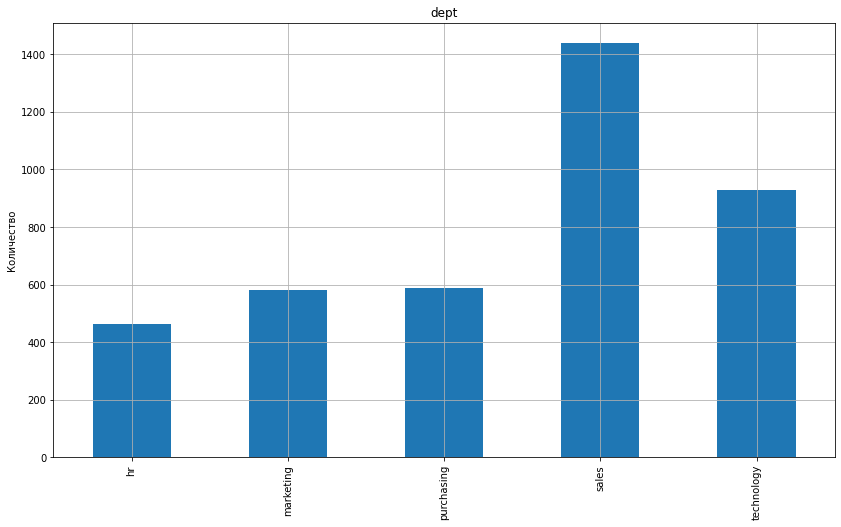

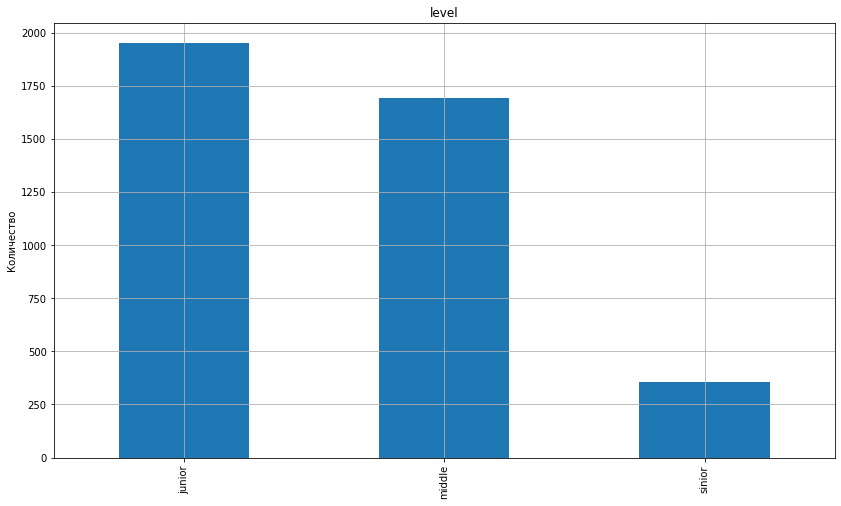

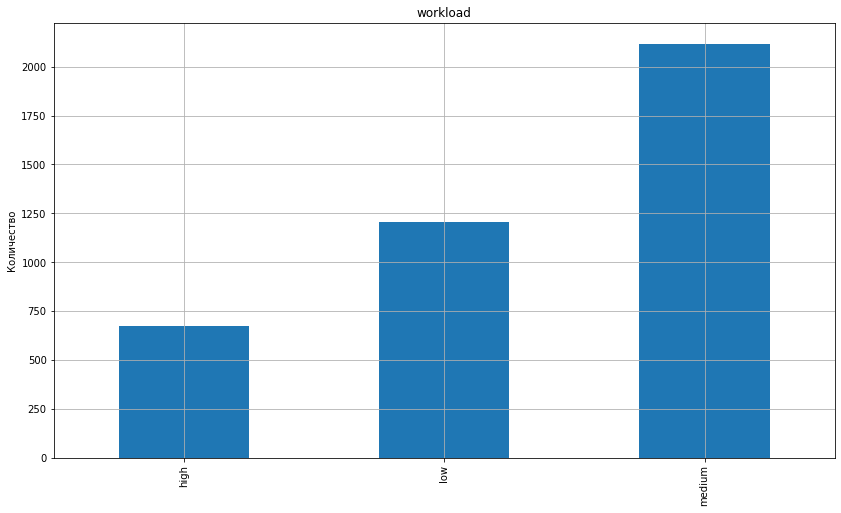

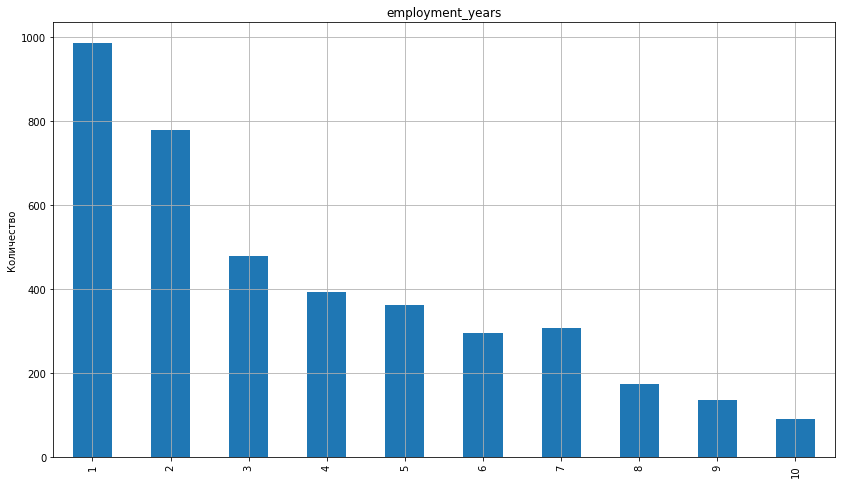

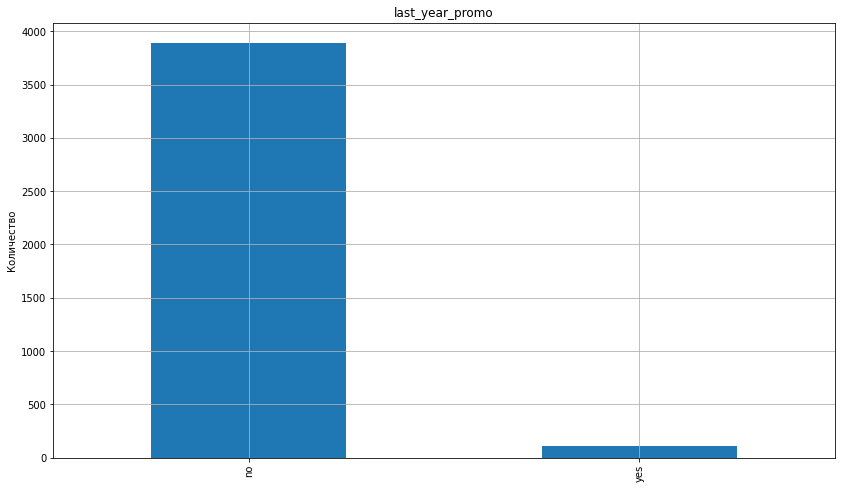

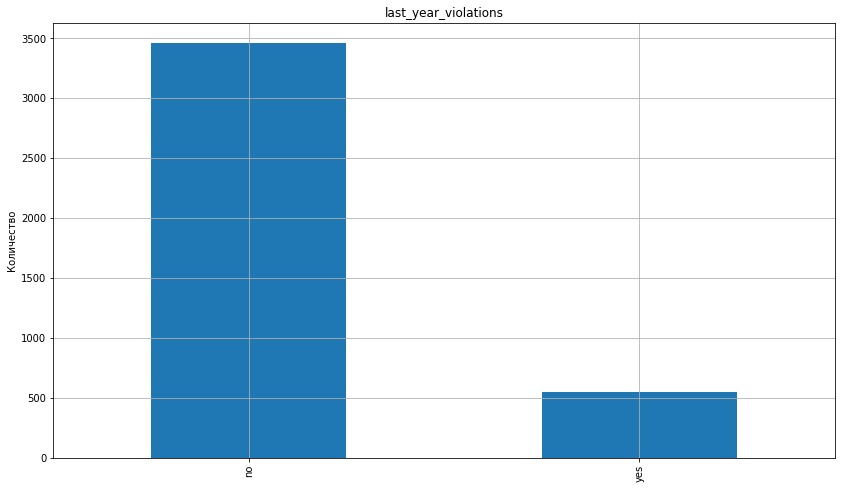

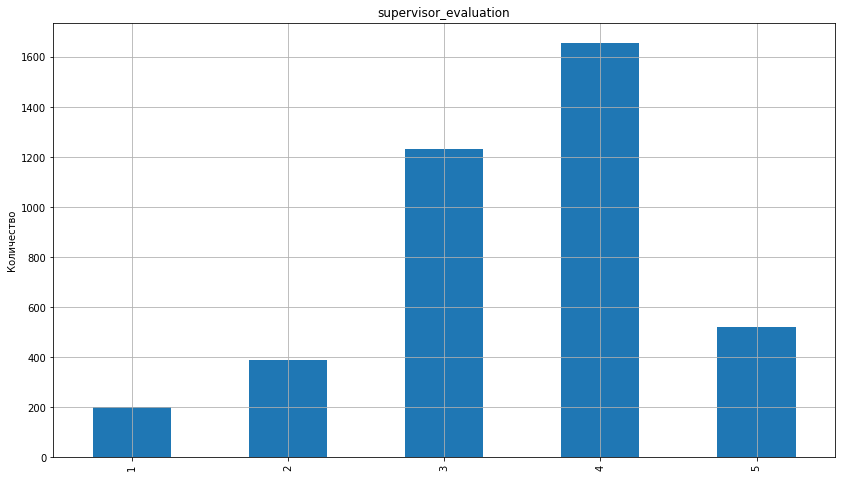

In [77]:
for col in bar_cols:
    create_bars(train_quit, col)

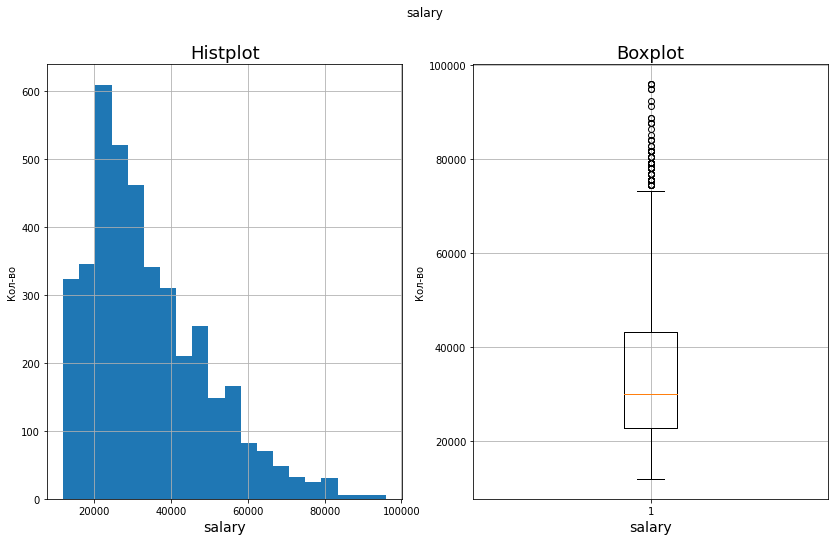

In [78]:
create_hists(train_quit, 'salary')

In [79]:
train_quit[train_quit['salary'] > 43100]['salary'].describe()

count     1023.000000
mean     55106.158358
std      10623.989359
min      43200.000000
25%      46800.000000
50%      52800.000000
75%      60000.000000
max      96000.000000
Name: salary, dtype: float64

#### 3.2. 
Составьте портрет «уволившегося сотрудника». Например, можно узнать, в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности. Также можно сравнить среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.

In [80]:
quited.sample()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
1792,182286,marketing,junior,medium,1,no,yes,2,30000,yes


In [81]:
stayed = train_quit[train_quit['quit'] == 'no']
stayed.sample()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
3655,431956,sales,middle,low,2,no,yes,4,28800,no


In [82]:
cat_ord = ["employment_years", "supervisor_evaluation", "level", "workload"]
num = ['salary']
binary = ["last_year_promo", "last_year_violations"]

In [83]:
def create_portrait(df, cat_cols, num_cols, binary_cols):
    
    plt.figure(figsize=(20,8))

    plt.subplot(1, 4, 1)
    df[cat_cols[0]].value_counts().plot(kind='bar');
    plt.title('Длительность работы в компании (в годах);')
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.grid()
    
    plt.subplot(1, 4, 2)
    df[cat_cols[1]].value_counts().plot(kind='bar');
    plt.title('Оценка качества работы сотрудника')
    plt.xlabel('')
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.grid()

    plt.subplot(1, 4, 3)
    df[cat_cols[2]].value_counts(normalize=True).plot(kind='bar');
    plt.xlabel('')
    plt.ylabel('Количество')
    plt.title('Уровень')
    plt.xticks(rotation=45)
    plt.grid()
    
    plt.subplot(1, 4, 4)
    df[cat_cols[3]].value_counts(normalize=True).plot(kind='bar');
    plt.xlabel('')
    plt.ylabel('Количество')
    plt.title('Загруженность')
    plt.xticks(rotation=45)
    plt.grid()
    
    plt.show()
    
    plt.figure(figsize=(15,5))

    plt.subplot(1, 2, 1)
    df[binary_cols[0]].value_counts().plot(kind='bar');
    plt.title('Наличие повышения в прошлом году')
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.grid()
    
    plt.subplot(1, 2, 2)
    df[binary_cols[1]].value_counts().plot(kind='bar');
    plt.title('Нарушения трудового кодекса')
    plt.xlabel('')
    plt.ylabel('Количество')
    plt.xticks(rotation=45)
    plt.grid()
    
    plt.show()

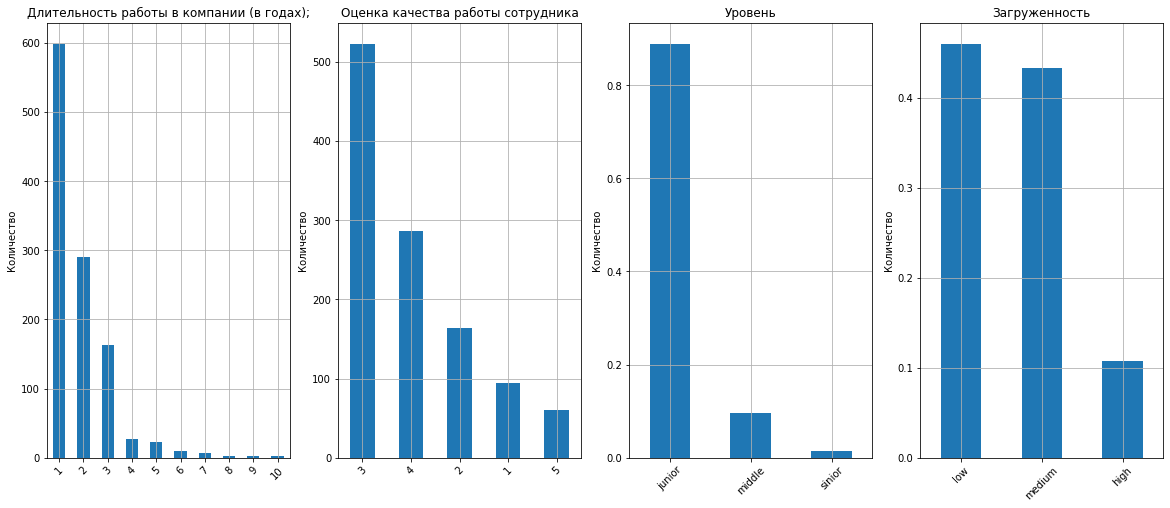

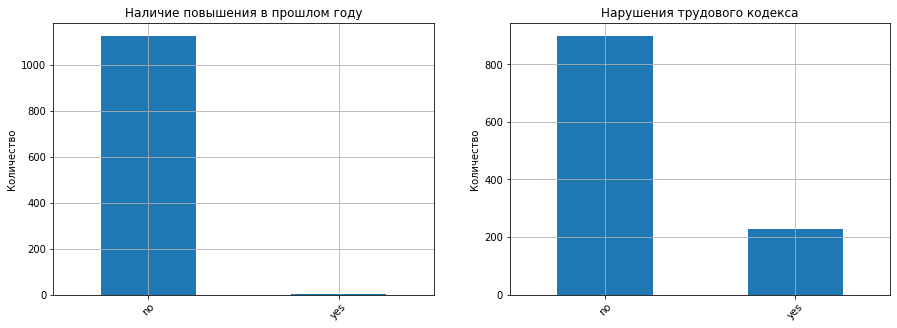

In [84]:
create_portrait(quited, cat_ord, num, binary);

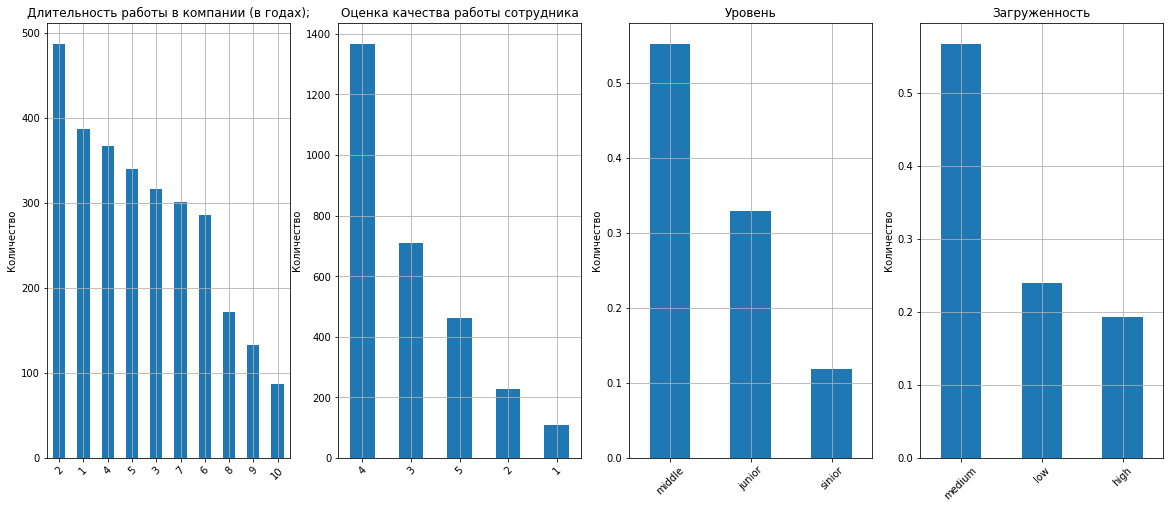

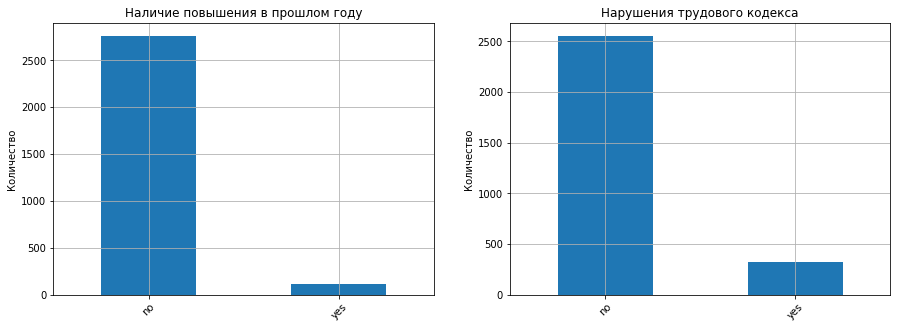

In [85]:
create_portrait(stayed, cat_ord, num, binary);

* Сразу бросается в глаза количество отработанных лет, ушедшие сотрудники в большинстве своем не задерживаются порой даже на два года и после 1 проработанного года уходят 


* Также стоит отметить, что на уход влияет и оценка качества работы со стороны руководителя, у ушедших сотрудников чаще низкие оценки, чем у оставшихся, даже если брать просто по частоте, у ушедших больше всего 3 затем 4 и потом 2. У оставшихся порядок 3, 4, 5. Возможно на фоне того, что сотрудники видят, что не справляются, то пишут заявления и уходят</font>

* В большинстве своем уходят новички, то есть junior специалисты, остальные же чаще остаются в компании и развиваются дальше.

* На удивление, загруженность у ушедших сотрудников колеблется от низкой до средней, высокой загруженности как таковой вообще почти нет в компании. Это интересное замечание, ведь уровень загруженности это один из важных пунктов при решении об увольнении

* Наличие повышений тоже мне казалось очень важным, однако у обеих групп очень низкое значение повышений

* Нарушение договора тоже мало что показывает, они примерно одинаковы по количеству у обеих групп

In [86]:
def compare_salary(df1, df2):    
    plt.figure(figsize=(15,5))
    plt.suptitle("Сравнение зарплат", fontsize=16)

    plt.subplot(1, 2, 1)
    
    sns.histplot(data=df1[num_cols]);
    plt.title('Гистограмма по оставшимся')
    plt.ylabel('')
    plt.xticks(rotation=45)
    plt.grid()
    
    plt.subplot(1, 2, 2)
#     plt.suptitle("Зарплата", fontsize=16)
    sns.histplot(data=df2[num_cols]);
    plt.title('Гистограмма по ушедшим')
    plt.ylabel('')
    plt.xticks(rotation=45)
    plt.grid()
    
    plt.show()
    
    plt.subplot(1, 2, 1)
    sns.kdeplot(data=df1[num_cols]);
    plt.title('KDE по оставшимся')
    plt.xlabel('')
    plt.ylabel('Плотность распределения')
    plt.xticks(rotation=45)
    plt.grid()
    
    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df2[num_cols]);
    plt.title('KDE по ушедшим')
    plt.xlabel('')
    plt.ylabel('Плотность распределения')
    plt.xticks(rotation=45)
    plt.grid()
    
    plt.show()

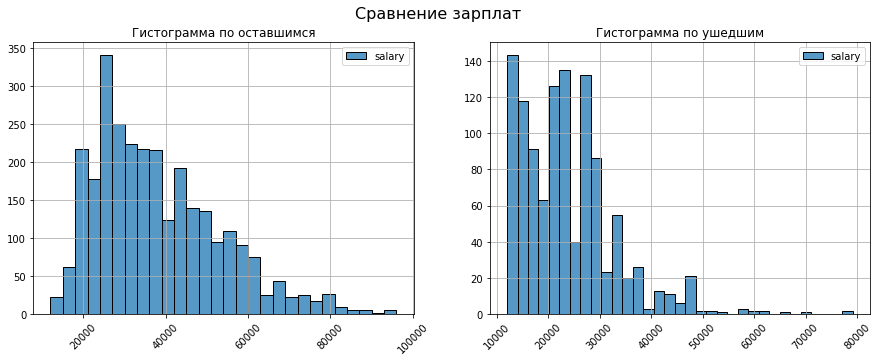

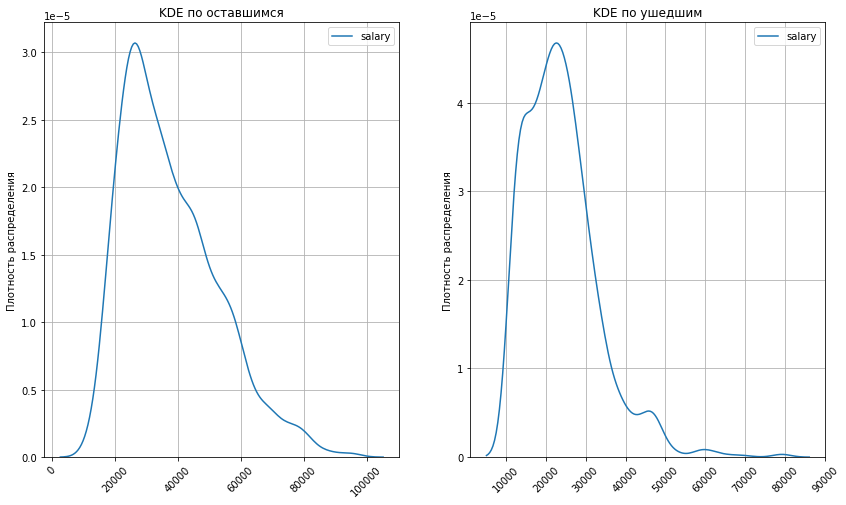

In [87]:
compare_salary(stayed, quited)

По графикам, видно, что зарплаты ушедших сотрудников в среднем от ~15 000 до примерно ~30 000

У оставшихся сотрудников значение зарплаты от ~20 000 до ~ 50 000

Однако, не думаю, что имеет смысл, сравнивать по зарплатам, значения могут варьироваться и меняться в любой момент. Уровень заработной платы действительно является важным показателем при переходе в другую компанию и наоборот устройства на работу, однако здесь, мне кажется, данные значения не играют роли относительно увольнений, хотя полностью отрицать это нельзя.

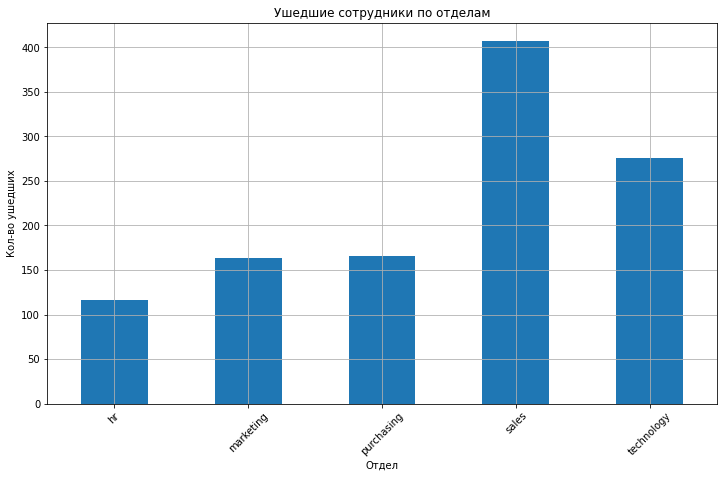

In [88]:
plt.figure(figsize=(12, 7))
quited.groupby('dept').count()['quit'].plot(kind='bar')
plt.grid()
plt.xlabel('Отдел')
plt.ylabel('Кол-во ушедших')
plt.xticks(rotation=45)
plt.title('Ушедшие сотрудники по отделам');

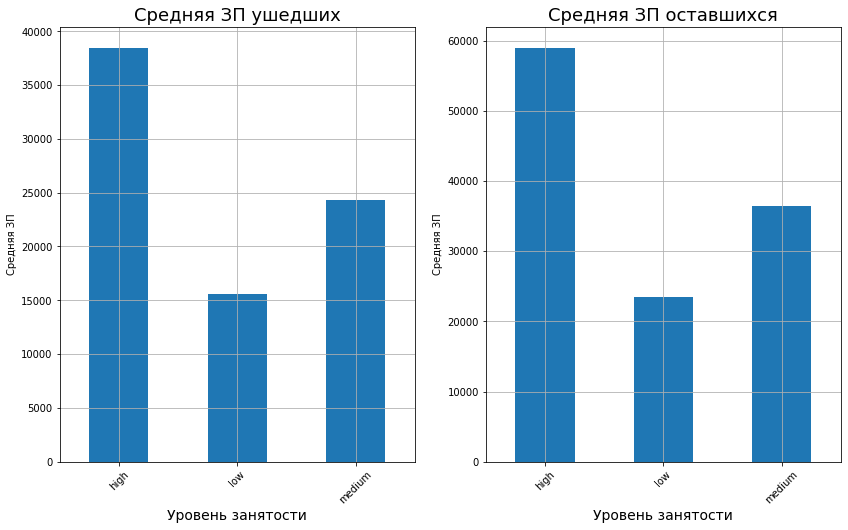

In [89]:
quit_sales = quited[quited['dept'] == 'sales']

plt.subplot(1,2,1)
plt.suptitle('')
    
quit_sales.groupby('workload')['salary'].mean().plot(kind='bar',figsize=(14, 8))
plt.title('Средняя ЗП ушедших', fontsize=18)
plt.xlabel('Уровень занятости', fontsize=14)
plt.ylabel('Средняя ЗП')
plt.grid()
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.suptitle('')

train_quit[train_quit['quit'] == 'no'].groupby('workload')['salary'].mean().plot(kind='bar',figsize=(14, 8))
plt.title('Средняя ЗП оставшихся', fontsize=18)
plt.xlabel('Уровень занятости', fontsize=14)
plt.ylabel('Средняя ЗП')
plt.grid()
plt.xticks(rotation=45);

#### 3.3. 

Аналитики утверждают, что уровень удовлетворённости сотрудника работой в компании влияет на то, уволится ли сотрудник. Проверьте это утверждение: визуализируйте и сравните распределения признака job_satisfaction_rate для ушедших и оставшихся сотрудников. Используйте данные с обоими целевыми признаками тестовой выборки.

In [90]:
test_df.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,0,0,5,28800,0.79
1,686555,hr,junior,medium,1,0,0,4,30000,0.72
2,467458,sales,middle,low,5,0,0,4,19200,0.64
3,418655,sales,middle,low,6,0,0,4,19200,0.60
4,789145,hr,middle,medium,5,0,0,5,40800,0.75


In [91]:
test_df_merge = test_df.set_index('id')['job_satisfaction_rate']
test_df_merge.sample()

id
951874    0.61
Name: job_satisfaction_rate, dtype: float64

In [92]:
quit_rate = pd.merge(test_df_merge, test_quit, on='id')
quit_rate.sample()

,id,job_satisfaction_rate,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
880,763530,0.27,hr,middle,medium,4,no,no,3,33600,yes


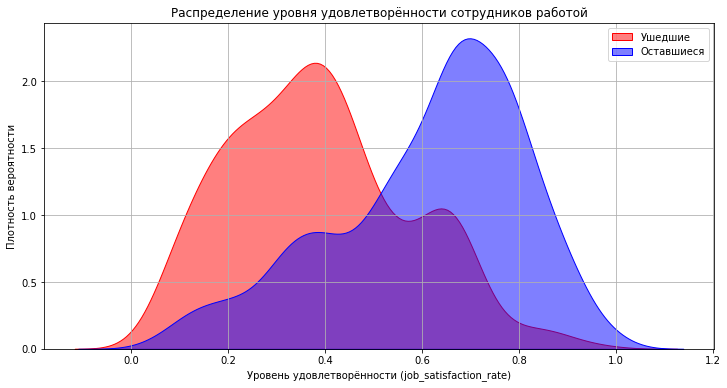

In [93]:
left = quit_rate[quit_rate['quit'] == 'yes']['job_satisfaction_rate']
stayed = quit_rate[quit_rate['quit'] == 'no']['job_satisfaction_rate']

plt.figure(figsize=(12, 6))
sns.kdeplot(left, label='Ушедшие', fill=True, color='red', alpha=0.5)
sns.kdeplot(stayed, label='Оставшиеся', fill=True, color='blue', alpha=0.5)

plt.title('Распределение уровня удовлетворённости сотрудников работой')
plt.xlabel('Уровень удовлетворённости (job_satisfaction_rate)')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid()
plt.show()

In [94]:
import numpy as np
import scipy.stats as stats

left = quit_rate[quit_rate['quit'] == 'yes']['job_satisfaction_rate']
stayed = quit_rate[quit_rate['quit'] == 'no']['job_satisfaction_rate']

#тест Колмогорова-Смирнова
ks_statistic, p_value = stats.ks_2samp(left, stayed)

print(f"Статистика KS: {ks_statistic}")
print(f"P-value: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: выборки имеют разные распределения.")
else:
    print("Не хватает доказательств для отказа от нулевой гипотезы")

Статистика KS: 0.5006963788300836
P-value: 3.9184605852288834e-93
Отвергаем нулевую гипотезу: выборки имеют разные распределения.


Не придумал как по-другому построить график, в голове был график рассеяния, однако не смог придумать, как его реализовать. Прочитал про kdeplot интересный график, который даже показывает по сути смещение.

Полученный график говорит о том, что у тех, кто остался уровень удовлетворенности намного выше и чаще, синний график выше и растягивается к 1. Однако стоит отметить и красный график, который намного шире. Видно, что из компании уходят и те работники, чей уровень удовлетворенноти был также высок

## Шаг 4. Добавление нового входного признака
Допустим, job_satisfaction_rate и quit действительно связаны и вы получили необходимое значение метрики в первой задаче. Тогда добавьте job_satisfaction_rate, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.

In [95]:
X_test_quit_rate = pd.merge(test_features,test_df_merge, on='id')

In [96]:
X_test_quit_rate.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79
1,686555,hr,junior,medium,1,no,no,4,30000,0.72
2,467458,sales,middle,low,5,no,no,4,19200,0.64
3,418655,sales,middle,low,6,no,no,4,19200,0.60
4,789145,hr,middle,medium,5,no,no,5,40800,0.75


In [97]:
df_test_quit = pd.merge(X_test_quit_rate, target_quit, on='id')
df_test_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate,quit
0,485046,marketing,junior,medium,2,no,no,5,28800,0.79,no
1,686555,hr,junior,medium,1,no,no,4,30000,0.72,no
2,467458,sales,middle,low,5,no,no,4,19200,0.64,no
3,418655,sales,middle,low,6,no,no,4,19200,0.60,no
4,789145,hr,middle,medium,5,no,no,5,40800,0.75,no


С одной стороны здесь заметен дисбаланс классов, с другой стороны, учитывая распределение уровня удовлетворенности (график ниже), данные кажутся весьма реальными. Ведь если уровень удовлетворенности у большинства высокий, то и желания уходить из компании у них меньше. Так что не вижу смысла делать сэмплирование, данные весьма презентабельны.

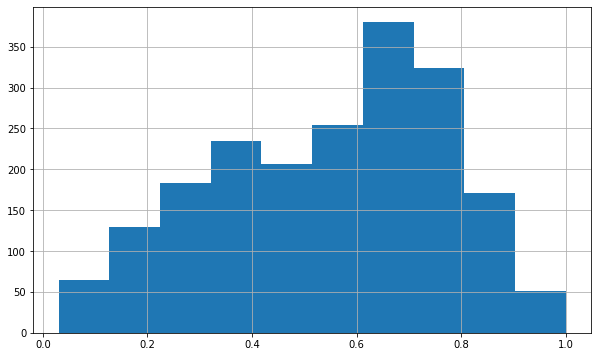

In [98]:
plt.figure(figsize=(10 ,6))
test_df['job_satisfaction_rate'].hist();

In [99]:
train_quit.sample()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
109,530528,technology,junior,medium,4,no,no,4,27600,no


In [100]:
X_train_quit = train_quit.drop('quit', axis=1)
y_train_quit = train_quit['quit']

X_train_quit_prep = prep.transform(X_train_quit)

In [101]:
X_test_quit = df_test_quit.drop('quit', axis=1)
y_test_quit = df_test_quit['quit']

In [102]:
le = LabelEncoder()

y_train_quit = le.fit_transform(y_train_quit)
y_test_quit = le.transform(y_test_quit)

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V3</b> 	

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b>

Кодирование таргета нельзя делать "руками":

- при появлении новых значений категориальных признаков, не предусмотренных твоим решением, модель или упадёт, или будет генерировать ошибки;
- такое решение не сделаешь частью пайплайна, а все современные решения базируются на них.
    
Поэтому кодирование нужно делать только с применением обучаемых трансформеров. Для кодирования целевого признака нужно использовать LabelEncoder (сокращаю до LE): https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html.

p.s. если стоит вопрос в том, что тебе не нравиться, что LE, например, присваивает классу "quit" метку 0, а "not quit" - метку 1, то значения меток можно инвертировать с помощью небольшого лайфхака:

        import numpy as np

        # Пример преобразованных классов
        target = np.array([0, 1, 1, 0, 1, 0])

        # Инвертирование классов
        inverted_target = 1 - target

        print("Исходные классы:", target)
        print("Инвертированные классы:", inverted_target)

В этом примере переменная inverted_target будет содержать те же значения, что и target, но значения будут инвертированы.

p.p.s. есть ещё метод invert_transform()
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V4</b> 	

Исправлено.
</div>

In [103]:
quit_prep = model.predict(X_train_quit_prep)

In [104]:
X_train_quit['job_satisfaction_rate'] = np.round(quit_prep, 2)

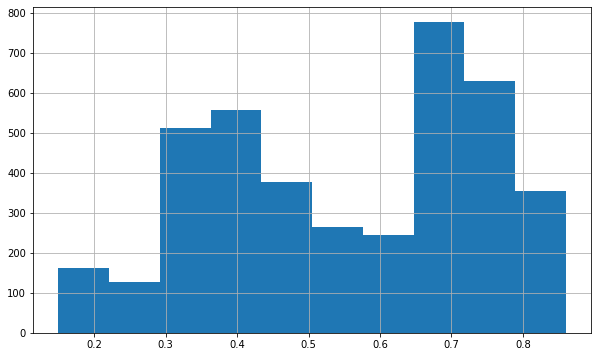

In [105]:
plt.figure(figsize=(10 ,6))
X_train_quit['job_satisfaction_rate'].hist();

In [106]:
X_train_quit.head()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,723290,sales,middle,high,2,no,no,4,54000,0.61
1,814010,sales,junior,medium,2,no,no,4,27600,0.80
2,155091,purchasing,middle,medium,5,no,no,1,37200,0.38
3,257132,sales,junior,medium,2,no,yes,3,24000,0.48
4,910140,marketing,junior,medium,2,no,no,5,25200,0.71


## Подготовка данных часть 2
Подготовьте признаки так же, как и в первой задаче: выполните подготовку в пайплайне, дополнив пайплайн предобработки. При кодировании учитывайте особенности признаков и моделей и используйте как минимум два кодировщика.

In [107]:
num_quit_col = X_train_quit.drop('id', axis=1).select_dtypes(include='number').columns.to_list()
label_col = ['quit']

In [108]:
ohe_quit_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        )
    ]
)

ord_quit_pipe = Pipeline(
    [
                (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['Junior', 'Middle', 'Sinior'],
                    ['Low', 'Middle', 'High']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)
data_quit_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_quit_pipe, ohe_col),
        ('ord', ord_quit_pipe, ord_col),
        ('num', StandardScaler(), num_quit_col)
    ], 
    remainder='passthrough'
)

In [109]:
pipe_quit_final=Pipeline([
    ('preprocessor', data_quit_preprocessor),
    ('models', DecisionTreeClassifier(random_state=42))
])

param_distributions = [
    {
        'models': [DecisionTreeClassifier(random_state=42)],
        'models__max_depth': range(2, 13),
        'models__max_features': range(2, 9),
        'models__min_samples_leaf': range(2, 10),
        'models__min_samples_split':range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    {
        'models':[LogisticRegression(random_state=42,
                                     solver='liblinear', 
                                     penalty='l1'
    )],
        
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    {
        'models':[KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
      'models':[RandomForestClassifier(random_state=42)],
      'models__max_depth': range(2, 13),
      'models__max_features': range(2, 9),
      'models__n_estimators': [50, 70, 100],
      'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

## Обучение модели
Обучите как минимум три модели. Как минимум для двух из них подберите гиперпараметры. Проверьте качество лучшей модели.
Метрика оценки качества в этой задаче — ROC-AUC. Критерий успеха: ROC-AUC 
≥0.91 на тестовой выборке. Напомним: отбор признаков часто помогает улучшить метрику.

In [110]:
X_train_quit.sample()

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
2919,459099,sales,junior,low,1,no,no,5,15600,0.66


In [111]:
random_quit_search = RandomizedSearchCV(
    pipe_quit_final,
    param_distributions,
    scoring='roc_auc',
    n_jobs=-1,
    cv=5,
    random_state=42
)
random_quit_search.fit(X_train_quit, y_train_quit)
print(random_quit_search.best_score_)
y_proba_quit = random_quit_search.best_estimator_.predict_proba(X_test_quit)[:, 1]
roc_auc = roc_auc_score(y_test_quit, y_proba_quit)
print(f'Тестовая: {roc_auc}')
print(random_quit_search.best_estimator_)

0.9201438146569669
Тестовая: 0.9176822191272052
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['last_year_promo',
                                                   'last_year_violations',
                                                   'dept']),
                  

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V3</b> 	

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Здесь хорошо. Расчёт ROC-AUC выполнен верно, через предсказанную вероятности класса 1. Здесь большой процент ошибок я часто вижу (коллеги делают расчет передавая вторым параметром не вероятность а признаки валидационной выборки). 
    
Площадь под ROC-кривой (Area Under Curve – площадь под кривой, Receiver Operating Characteristic – рабочая характеристика приёмника ... пришло из области радиоэлектроники) – это метрика оценки для задач бинарной классификации. ROC-кривая показывает зависимость между долей верно классифицированных объектов положительного класса и долей ложноположительных объектов. Ну и сама площадь под ROC-кривой является мерой качества классификатора: чем выше значение AUC (Area Under Curve), тем лучше качество классификации конкретной модели. Наш глаз и мозг устроены так, что мы очень хорошо видим геометрическую разницу (в данном случае площадей).
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Ухожу на другю когорту, нужно немного отдохнуть, учеба и работа давят. Можешь пожалуйста написать побольше всяких советов для решения проектов и прокачки себя, буду очень благодарен</font>
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Отдыхать полезно, за время отдыха успел написать еще один проект только уже в университете, углубился больше  в теорию и в целом больше потренировался, вернулся к этому проекту и был удивлен, что он вызывал у меня какие-то серьзные вопросы. Хотя буду честен, чаще всего мне было просто лениво или сонно его делать. Я надеюсь, что за эти слова я непоплачусь) Однако все еще остае.тся проблемы с визуализацией признаков через SHAP и не до конца понимаю механизм отбора признаком, в том плане, что после того, как я оценил их важность, что делать дальше? Мне начисто удалять признак и заново делать пайплайны и обучать модель? Отдельное спасибо за полезную литературу! Очень вам благодарен. И в целом, пока ,вы самый интересный и "полезный", извиняюсь за такой эпитет), ревьюер, вы очень много полезного написали и в целом очень приятно читать  ваши комментарии. Я очень, надеюсь, что в будущем вы еще сможете оценить мои проекты, и я смогу дальше получать полезные отзывы)</font>
</div>

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Безусловно, если есть какие-то косяки, ну кроме общего вывода, я просто на ночной смене и не очень сильно хочу его пока писать) Но обязательно его напишу, если вернешь проект, как собственно и исправлю все недочеты.</font>
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Не вопрос! Лови "список" интересных и полезных ресурсов:

1. файл с каналами Телеграмм, которые читаю сам. Обрати внимание на Валерия Бабушкина (его канал в Телеграмме: "Время Валеры"). Наверное самая известная и влиятельная личность России в области МЛ и ДС. Ищи его видео в Ютубе. Найдёшь много. И это будет полезно.

Ссылка: https://docs.google.com/document/d/1Nmx_sCK4_CRqVjXaHkiXMquNEBfNx2Lv/edit?usp=sharing&ouid=113884985001361230957&rtpof=true&sd=true

2. Обрати внимание на https://checkio.org/  - там можно решать Питоновские задачки, но не просто в тренажере, а как будто находясь в компьютерной игре. Пишешь код, а выглядит всё как будто-то новый мир, острова открываешь. Прикольный сайт.

3. Ссылка на книги по теории анализа данных (читаются легко, как художественная литература, но полезны): https://drive.google.com/file/d/1OFkHK4es34UUgzc5a3TWGkoKrbiU0m54/view?usp=sharing

4. Ссылка на книги по статистике и теории вероятности: https://drive.google.com/file/d/1F5T9Duk2b22WL1M7OhDRIVj_wjUCfq4z/view?usp=sharing

5. Ссылка на книги по Computer Science: https://drive.google.com/file/d/1XUXfQwmogOgHa2zxUsaENGAjM4HUnv5R/view?usp=sharing

6. Ссылка на книги по ML и анализу данных: https://drive.google.com/file/d/1O4EwxEjC2yTUDOXpWfs-gNRBERt6ypbP/view?usp=sharing

7. Ссылка на книги по Python: https://drive.google.com/file/d/1BtgfZe0zjNC4__3xp4az2oST-zumj-Id/view?usp=sharing

8. Ссылка на книги визуализации: https://drive.google.com/file/d/1x50vTi_g1BH1mB6Gt2f0eCDULb24Rv_T/view?usp=sharing

9. Интересные "тетрадки" (с точки зрения того, как другие люди пишут код .. ну и сам анализ/ход мыслей) с Кагла и ODS. Распакуй в отдельную папку - в подпапках будет "тетрадь" в формате локального ноутбука (или html-файл с кодом).

Ссылка: https://drive.google.com/file/d/1DNn4bkod_gPkUaJoDqTaoBNi8ZFmM2x7/view?usp=sharing

10. НАСТОЯТЕЛЬНО РЕКОМЕНДУЮ смотреть канал Анатолия Карпова!!! Вот он на Ютуб: https://www.youtube.com/channel/UCiZtj9HjyudBwC2TywG0GzQ/videos
В канале Анатолия на Ютубе есть разборы собеседований на вакансию дата-аналитика (можно использовать в подготовке). Также обрати внимание на курсы по статистике от Анатолия на Степике.

11. Всё (ну или 90% от всего что нужно :-)))) находится тут: https://ods.ai/ Все самые известные люди (в  т.ч. и золотые медалисты Kaggle) тут. Доброжелательная общалка в Слаке - ссылка на главной странице. Соревнования. Видео. Группы по интересам, в том числе и по городам - всё найдёшь тут.

12. Смотри каналы: https://www.youtube.com/channel/UCiZtj9HjyudBwC2TywG0GzQ/videos и https://www.youtube.com/c/DataStart/videos 
    
    
</div>

<div class="alert alert-success">
<b>КОММЕНТАРИЙ V2</b> 	

Иван, вижу что проект оборвался "на середине" -  2я задача недоделана. 
    
Прошу тебя за время "отдыха" с помощью преподавателя "допилить" проект так, чтобы следующая итерация была крайней и я мог с чистым сердцем поздравить тебя с успешной сдачей работы! Хорошо?
</div>

# Результат ревью:

Я отмечаю адекватный уровень твоей программистской подготовки. Ты используешь продвинутые концепции языка Python, библиотеки pandas и одной из основных библиотек машинного обучения sckit-learn. Всё это в целом упрощает твой код и одновременно показывает твой уровень владения инструментами анализа данных и machine learning.

С комментированием никаких проблем нет. Твоих объяснений достаточно для понимания твоими коллегами хода мыслей. Ссылки из брифа проекта в нужных местах также помогают следовать за развитием событий и дают полную информацию касаемо того, что будет происходить в том или ином разделе проекта.

Мне было просто проверять твой проект, потому что он чётко структурирован, с использованием оглавления. 

Зелёным цветом я отметил и прокомментировал удачные и элегантные решения, на которые ты можешь опираться в будущих проектах.

Жёлтым цветом я выделил то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас.

Однако есть принципиальные моменты, которые не позволяют мне принять твой проект в его нынешнем состоянии:

<div class="alert alert-danger">
<b>Необходимо исправить ❌</b> 

1. (25) Нет, это неверно и нелогично. Вначале данные нужно исследовать (EDA, визуализации, корреляции), а уже потом, в начале раздела с МЛ-моделированием делить их на выборки.
    
2. (30 и ниже) Следует соблюдать правила оформления графиков.
    
3. (31) Ряд признаков в наших данных имеет дискретную природу (например это **employment_years** и **supervisor_evaluation**). Для графического анализа дискретных признаков нужнен тип графиков, который на каждое уникальные значение признака строит свою корзину. Например, можно использовать **sns.countplot** или **.plot(kind='bar')**. Ты же для визуализации их используешь гистограмму.    
    
4. () Здесь создаём scorer. Но ты НЕ указываешь указываешь **greater_is_better=False**, SMAPE - это ошибка, а мы её должны минимизировать!
    
5. (50) Иван, у тебя изначально есть трейн и тест. Вижу что здесь ты используешь кросс-валидацию (КВ). **Зачем тебе валидационная выборка?** Понимаешь сколько выборок достаточно для того, чтобы использовать КВ?
    
6. (53) А где в теории ты нашёл то, что лучшую модель по результатам кросс-валидации следует тестировать на валидационной выборке "отрезанной" от тренировочной?
</div>

Эти моменты требуют твоего внимания. Комментарии по ним помечены красным цветом. 

Подводя итог: хорошая работа на самом-то деле, молодец! Есть несколько моментов к исправлению, но уверен, что они не вызовут у тебя сложностей. После доработки обязательно проверь комментарии и выводы. Их нужно будет скорректировать. Жду доработанную версию проекта на повторное ревью.